# Julia绘图

Julia绘图主要使用`Plots`和`Makie`两个包， 使用一段时间后发现`Makie`的绘图功能更
有逻辑， 简单易学， 定制性强， LaTeX和汉字支持完备, 他的绘图逻辑和`Matplotlib`非常像。

目前已知的问题
+ `GLMakie`仅支持导出为位图， 在REPL中使用可以弹出一个GUI窗口显示绘图结果
+ `CairoMakie`支持导出为位图(png)和矢量图(svg, pdf)， 但是在REPL中无法弹出窗口显
  示绘图结果， 官方推荐保存到本地查看， 或者使用vscode,jupyter等编辑器


图形构成：
+ Figure: 画布， 一个画布可以包含多个坐标系
+ Axis： 坐标系， 一个坐标系仅能在一个画布中， 坐标系是我们的绘图区域
    - 这里与Matplotlib的Axes很像但是叫法不一样
+ Plots： 绘图元素，点，线，文字，图形等

In [4]:
using GLMakie
using LaTeXStrings
# CairoMakie.activate!(; type = "svg")

## 依次创建

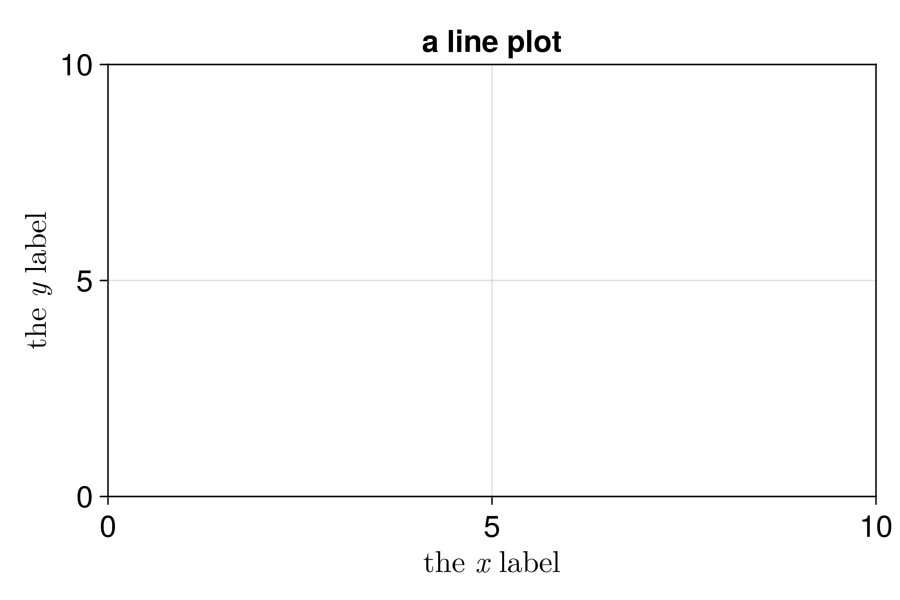

In [9]:
# 创建一个画布， 可以设置分辨率和字号， 由于画布是白的， 我们看不到
f = Figure(size = (600, 400), fontsize = 20)

# 在画布中创建一个绘图区域， 这里使用数组下标来表示位置, 这样就可以很方便的创建多个子图
# 在这里可以设置很多东西
ax = Axis(f[1, 1],
    title = "a line plot", 
    xlabel = L"the $x$ label", 
    ylabel = L"the $y$ label")
f

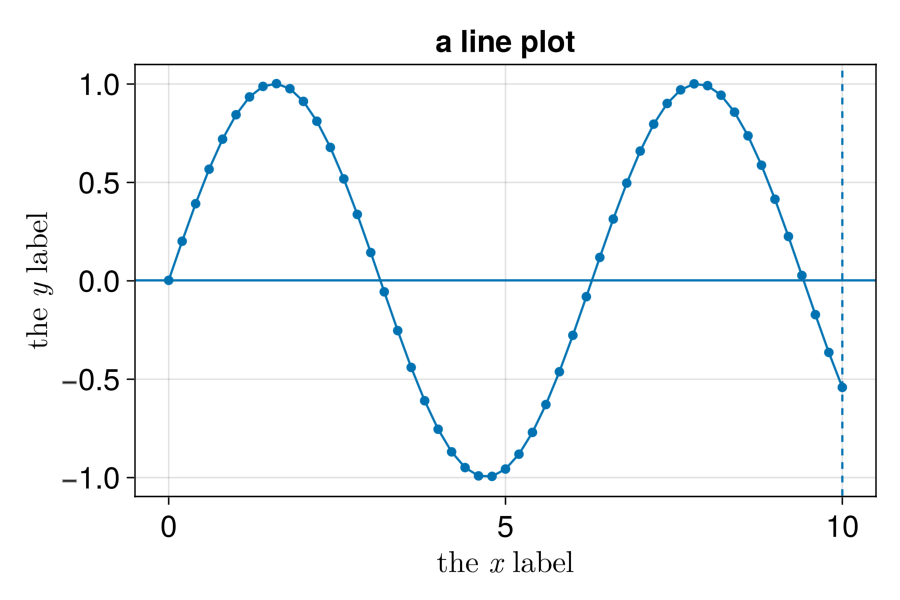

In [10]:
# 画布和绘图区域创建好了， 就可以在其中画图了
x = 0:0.2:10
y = sin.(x)
lines!(f[1, 1], x, y)
scatter!(f[1, 1], x, y) # 在绘图区域画散点， “修改Axes”， 要用带叹号的函数
vlines!(f[1, 1], 10, linestyle = :dash) # 在 x = 10 这一点画一条竖线
hlines!(f[1, 1], 0)  # 在 y = 0 这一点画一条横线
#=一个细节
图层： line是第一个图层， scatter是第二个图层， scatter在line之上， 要是line在scatter至上就能看到线穿过圆圈
=#
f # 显示绘图结果

In [15]:
#= 一个细节
GLMakie无法存储为pdf貌似， CarioMakie可以
=#

save("./figure/demo1.png", f, pt_per_unit = 1)

关于图片的注意事项

学术出版时， 图片一般要求为pdf格式，而且图片中的文字可以选择， 最好图片中的文本字号和你的正文字号一致
那么**导出pdf格式时要加上pt_per_unit = 1**这个选项（必须要加）， 另外导出为pdf时分辨率选项就失去了意义， 因为pdf是矢量图格式， 而且导出的pdf（矢量图）和我们在Jupyter(位图)看到的不一样。

## 一次创建

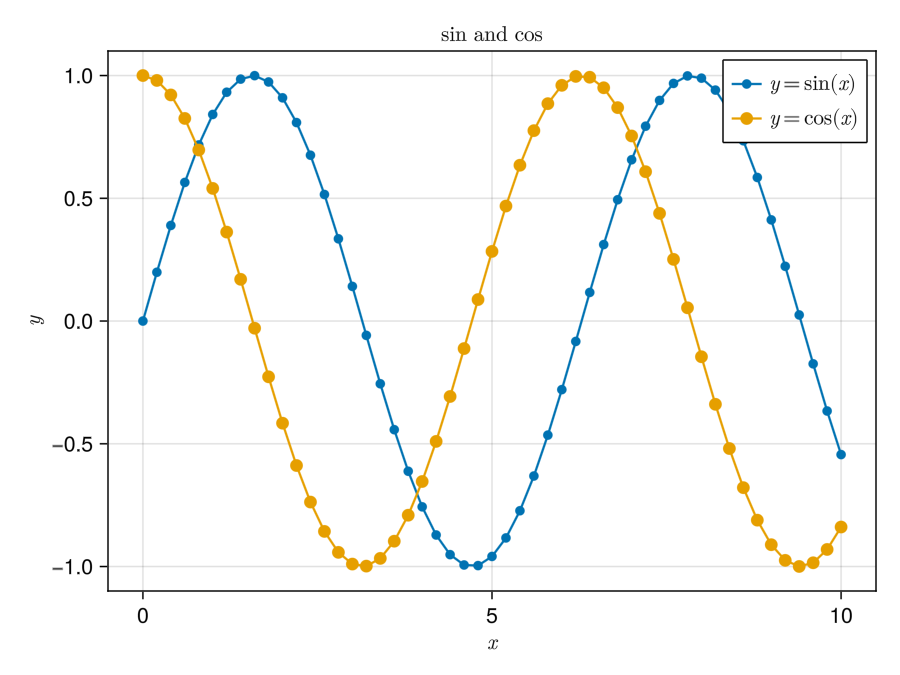

In [16]:
# 画布， 绘图区域， Plots
f, ax, _ = scatterlines(x, y, label = L"$y = \sin(x)$")
scatterlines!(ax, x, cos.(x), label = L"$y = \cos(x)$", markersize = 12)
ax.xlabel = L"$x$"
ax.ylabel = L"$y$"
ax.title = L"$\sin$ and $\cos$"
axislegend(ax; position = :rt)

f

## Layout布局

In [17]:
f = Figure(;size = (600, 400), fontsize = 12)
ax11 = Axis(f[1, 1]; title = L"$y = \sin(x)$", xlabel = L"$x$", ylabel = L"$y$")
ax12 = Axis(f[1, 2]; title = L"$y = \cos(x)$", xlabel = L"$x$", ylabel = L"$y$")
ax212 = Axis(f[2, 1:2]; title = L"$y = \sin(x) \cdot \cos(x)$", xlabel = L"$x$", ylabel = L"$y$")

Axis with 0 plots:


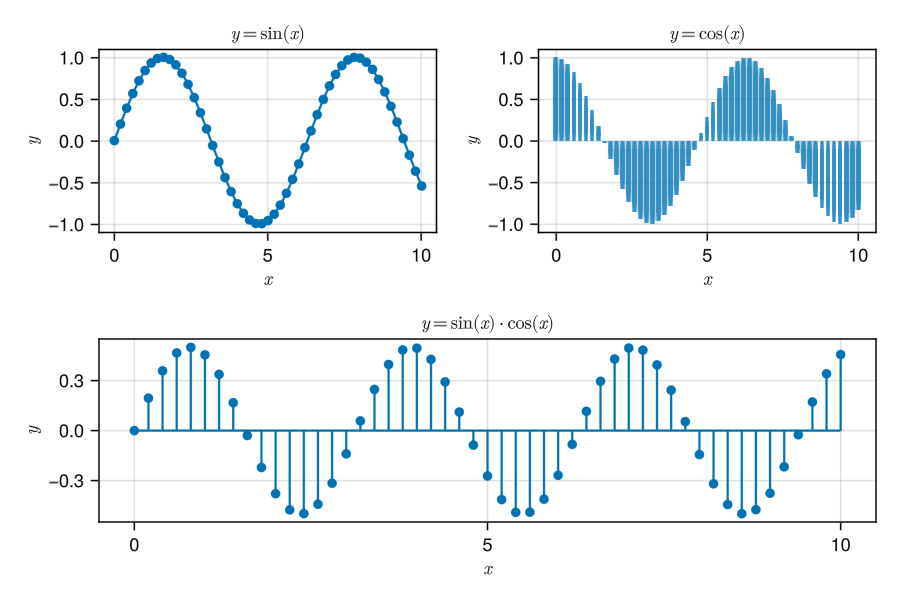

In [18]:
scatterlines!(ax11, x, sin.(x))
barplot!(ax12, x, cos.(x))
stem!(ax212, x, sin.(x) .* cos.(x))
f

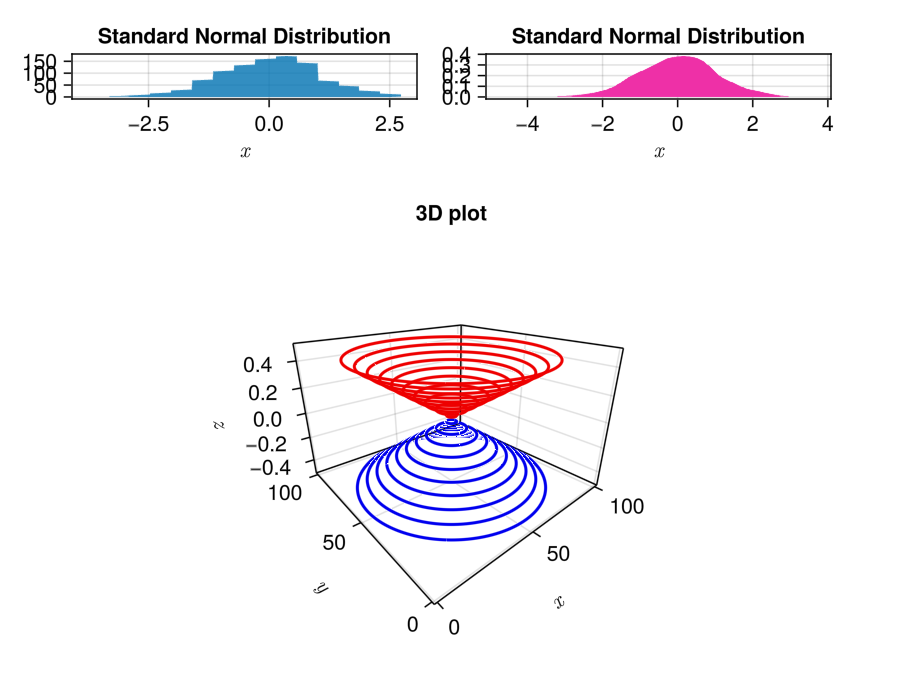

In [21]:
## 概率分布图
x = randn(1000);
f, ax11, histplot = hist(x; axis = (xlabel = L"$x$", title = "Standard Normal Distribution"))
ax12 = Axis(f[1, 2];title = "Standard Normal Distribution", xlabel = L"$x$")
density!(ax12, x, color = :maroon2)
ax3d = Axis3(
    f[2, 1:2], 
    title = "3D plot", 
    # aspect=(0.5,0.5,1), 
    perspectiveness=0.75, 
    height = 250,
    xlabel = L"$x$",
    ylabel = L"$y$",
    zlabel = L"$z$"
)

xs = ys = LinRange(-0.5, 0.5, 100)
zs = [sqrt(x^2+y^2) for x in xs, y in ys]

contour3d!(ax3d, -zs, levels=-(.025:0.05:.475), linewidth=2, color=:blue2)
contour3d!(ax3d, +zs, levels=  .025:0.05:.475,  linewidth=2, color=:red2)
f